In [1]:
import numpy as np

In [3]:
import yfinance as yf

In [5]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)

In [7]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

C:\Users\gadda\AppData\Local\Temp\ipykernel_25168\2891900888.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  google_data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [8]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2015-12-21,37.110168,37.220838,36.724560,37.028778,30514000
2015-12-22,37.220840,37.461536,36.999005,37.302727,27308000
2015-12-23,37.236217,37.429766,36.923068,37.393042,31318000
2015-12-24,37.141430,37.287835,37.053096,37.198505,10544000
2015-12-28,37.841686,37.865510,37.197023,37.365756,30306000


In [11]:
google_data.shape

(2514, 5)

In [13]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,99.441963,100.490962,98.352672,99.382015,2.903276e+07
std,56.124360,56.803550,55.444331,56.122034,1.383971e+07
min,33.164265,33.364764,32.906198,33.143917,6.809800e+06
25%,53.595280,54.215686,52.959586,53.593913,2.026950e+07
50%,87.314629,88.064758,86.352345,87.043907,2.570490e+07
75%,137.044643,138.164597,135.741651,137.031867,3.342750e+07
max,323.428986,328.455705,319.771365,326.586898,1.269620e+08


In [15]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2514 entries, 2015-12-21 to 2025-12-18
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   2514 non-null   float64
 1   (High, GOOG)    2514 non-null   float64
 2   (Low, GOOG)     2514 non-null   float64
 3   (Open, GOOG)    2514 non-null   float64
 4   (Volume, GOOG)  2514 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.8 KB


In [17]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

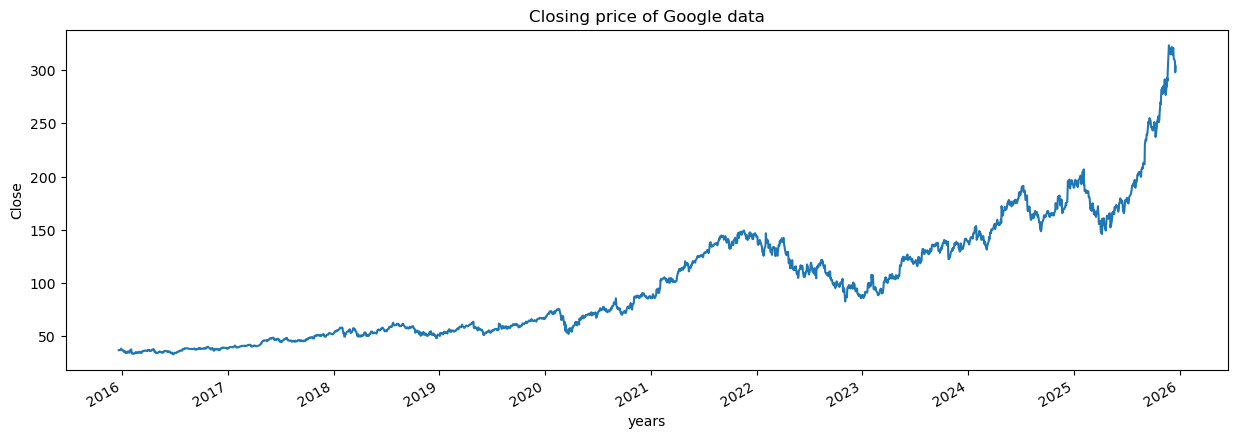

In [20]:
plt.figure(figsize = (15,5))
google_data['Close']['GOOG'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")
plt.show()




In [23]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [25]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

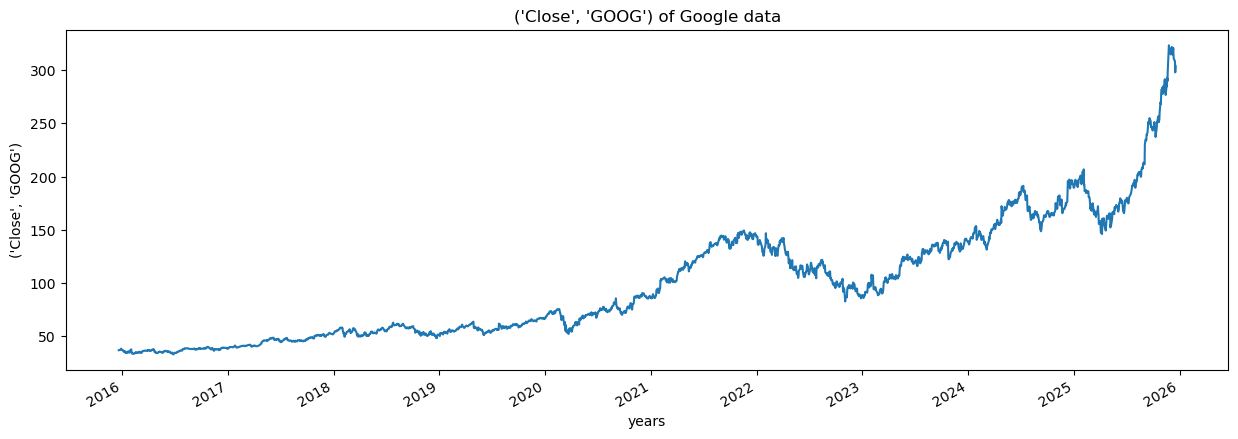

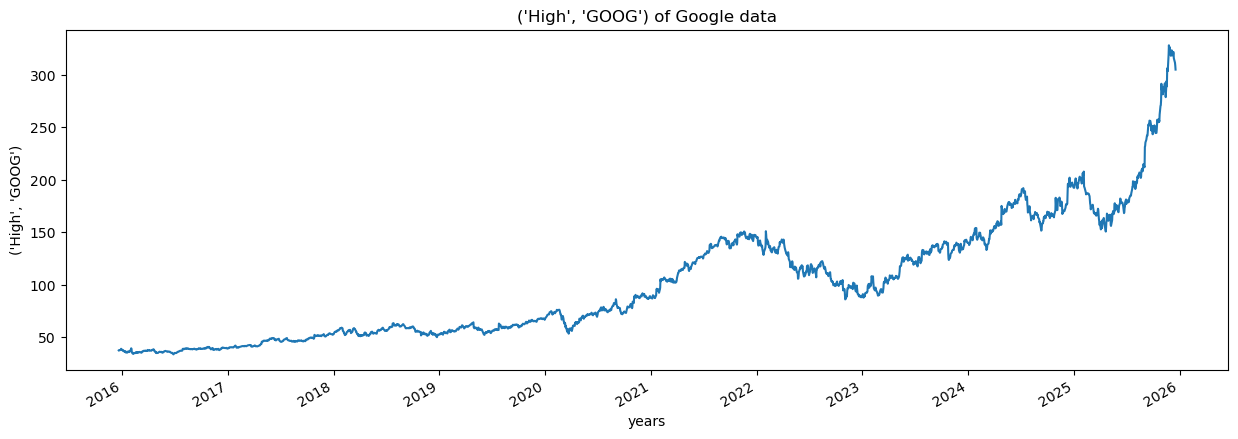

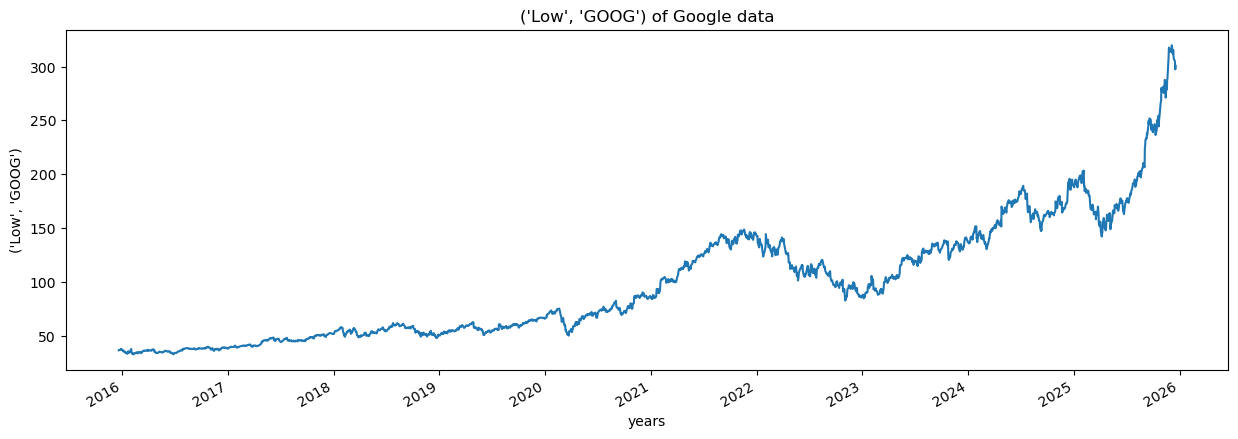

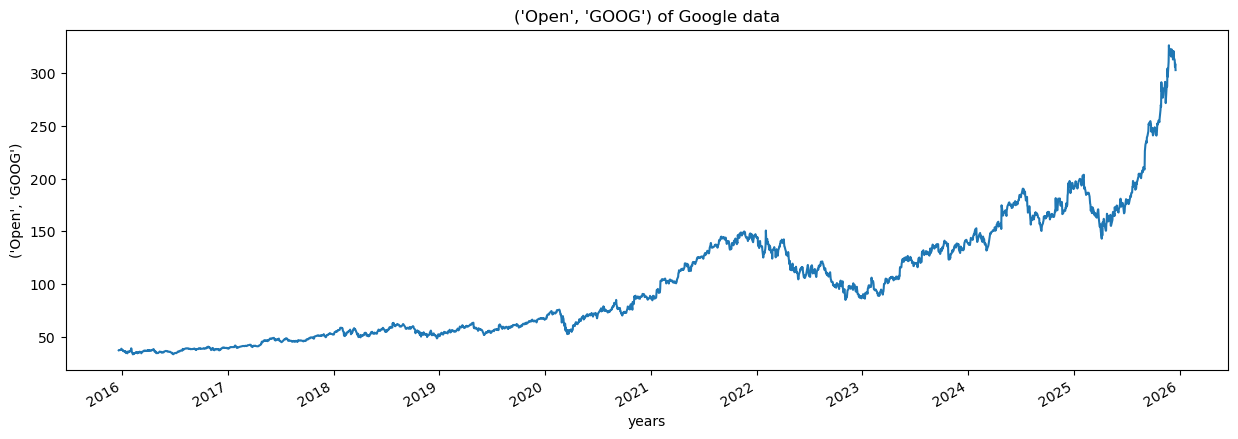

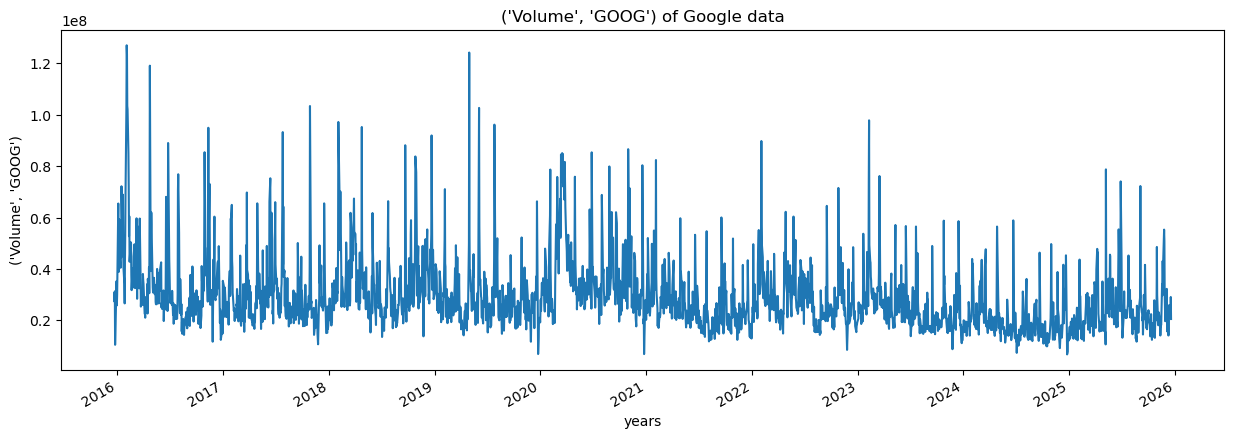

In [27]:

for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)
    plt.show()


In [29]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [31]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [33]:
data['MA'] = data.rolling(5).mean()
data


,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [35]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 0
2015 8
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [37]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [39]:
google_data['MA_for_250_days'][0:250].tail()

Date
2016-12-09          NaN
2016-12-12          NaN
2016-12-13          NaN
2016-12-14          NaN
2016-12-15    36.830914
Name: MA_for_250_days, dtype: float64

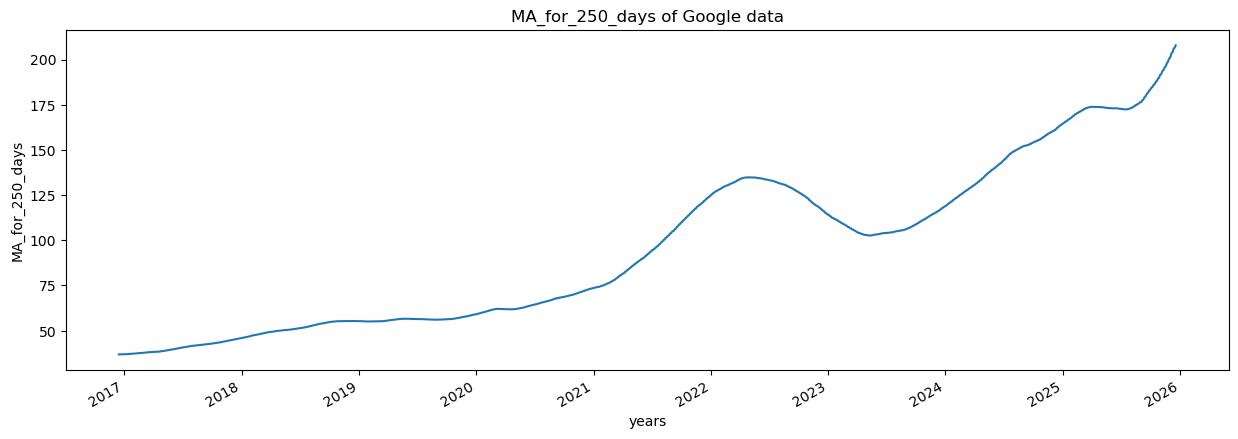

In [41]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')
plt.show()

<Figure size 640x480 with 0 Axes>

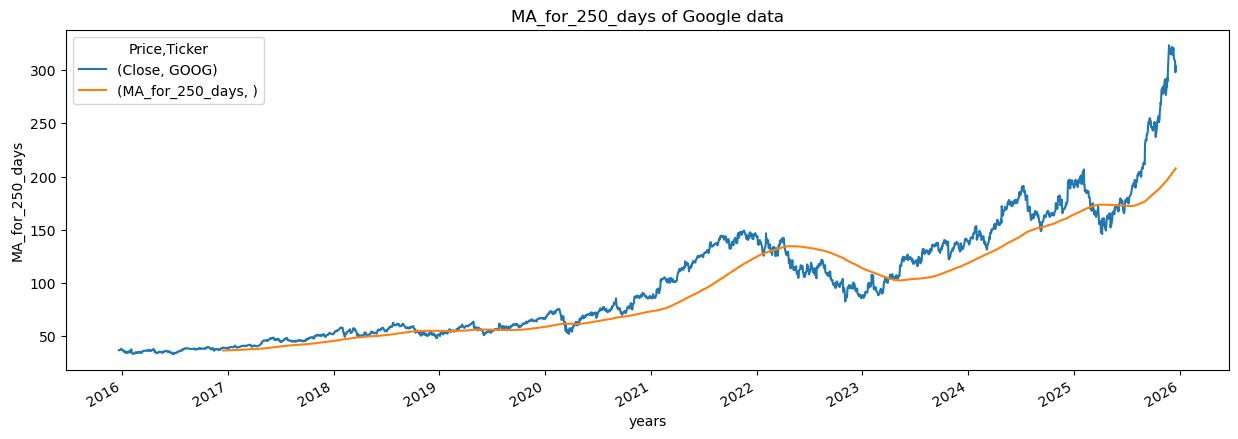

In [43]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')
plt.show()

<Figure size 640x480 with 0 Axes>

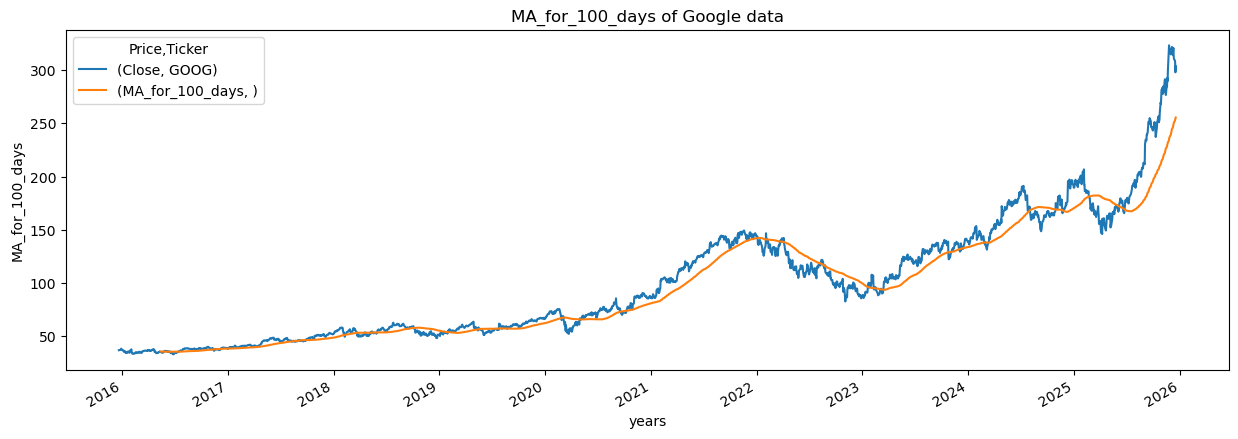

In [45]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')
plt.show()

<Figure size 640x480 with 0 Axes>

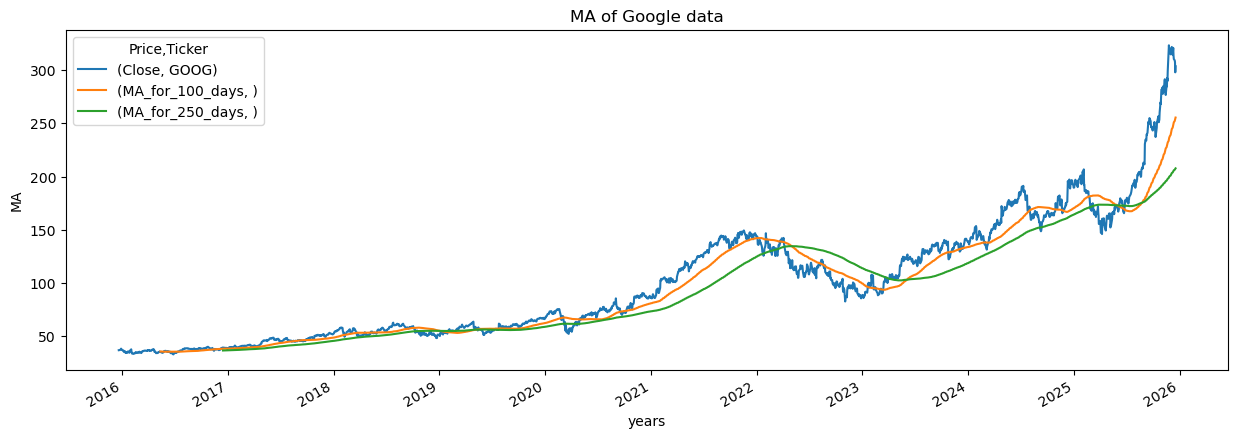

In [47]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')
plt.show()

In [51]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2015-12-21,37.110168,NaN
2015-12-22,37.220840,NaN
2015-12-23,37.236217,NaN
2015-12-24,37.141430,NaN
2015-12-28,37.841686,NaN


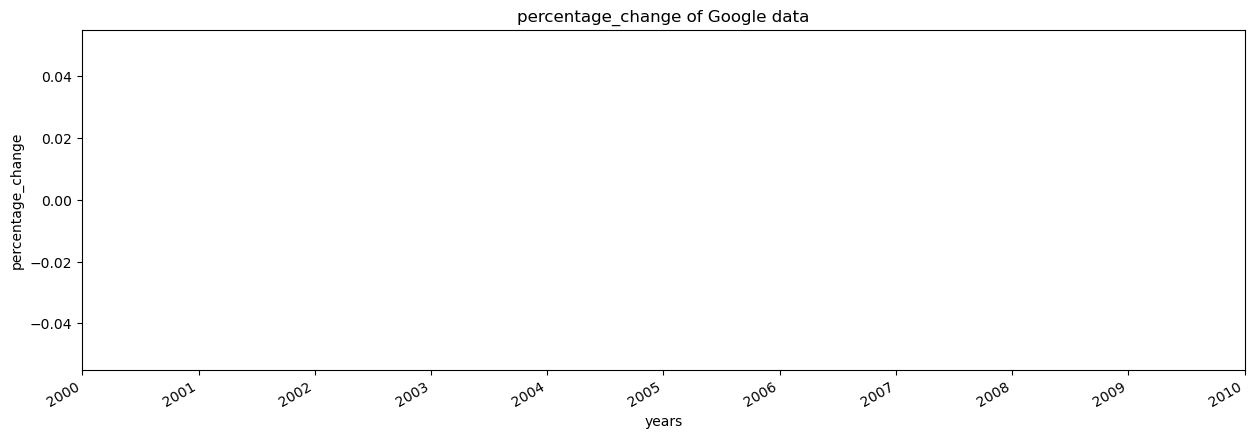

In [53]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')
plt.show()

In [55]:
close_price = google_data[['Close']]

In [57]:
max(close_price.values),min(close_price.values) 

(array([323.4289856]), array([33.16426468]))

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.01359416],
       [0.01397544],
       [0.01402841],
       ...,
       [0.94591498],
       [0.91260051],
       [0.93220332]])

In [60]:
len(scaled_data)

2514

In [63]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [65]:
x_data[0],y_data[0]

(array([[0.01359416],
        [0.01397544],
        [0.01402841],
        [0.01370186],
        [0.01611433],
        [0.01852335],
        [0.01756588],
        [0.01549368],
        [0.01258027],
        [0.01270679],
        [0.01288461],
        [0.00993872],
        [0.00790072],
        [0.00816741],
        [0.009884  ],
        [0.00552247],
        [0.00794346],
        [0.0044778 ],
        [0.00573276],
        [0.00516169],
        [0.00655343],
        [0.0097438 ],
        [0.00742199],
        [0.00765621],
        [0.00542502],
        [0.01072006],
        [0.01277007],
        [0.01431737],
        [0.01648018],
        [0.01003445],
        [0.0067962 ],
        [0.0026176 ],
        [0.0024757 ],
        [0.00168409],
        [0.00271164],
        [0.00253895],
        [0.00241755],
        [0.00388796],
        [0.0068629 ],
        [0.00497361],
        [0.0055823 ],
        [0.00653122],
        [0.00471718],
        [0.00535148],
        [0.00640981],
        [0

In [67]:

int(len(x_data)*0.7)

1689

In [69]:

2514-100-int(len(x_data)*0.7)

725

In [71]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1689, 100, 1)
(1689, 1)
(725, 100, 1)
(725, 1)


In [75]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [76]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


C:\Users\gadda\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [81]:
model.fit(x_train, y_train, batch_size=1, epochs = 10)

Epoch 1/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 148s 84ms/step - loss: 0.0013
Epoch 2/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 197s 117ms/step - loss: 2.7295e-04
Epoch 3/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 173s 102ms/step - loss: 1.3652e-04
Epoch 4/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 286s 169ms/step - loss: 1.3340e-04
Epoch 5/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 262s 155ms/step - loss: 9.8356e-05
Epoch 6/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 193s 114ms/step - loss: 8.6542e-05
Epoch 7/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 284s 163ms/step - loss: 8.5253e-05
Epoch 8/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 200s 118ms/step - loss: 7.8406e-05
Epoch 9/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 90s 53ms/step - loss: 8.2217e-05
Epoch 10/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - loss: 6.1562e-05


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [42]:
predictions = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step


In [43]:
predictions

array([[0.33410743],
       [0.33492905],
       [0.33914307],
       [0.34554124],
       [0.3538247 ],
       [0.3123959 ],
       [0.3018669 ],
       [0.3188193 ],
       [0.31158996],
       [0.293352  ],
       [0.2783083 ],
       [0.26315325],
       [0.27531332],
       [0.28360814],
       [0.28411004],
       [0.27731717],
       [0.30448672],
       [0.31635523],
       [0.3134095 ],
       [0.32439774],
       [0.32650495],
       [0.32484365],
       [0.32232222],
       [0.31456828],
       [0.32075742],
       [0.32739028],
       [0.3224314 ],
       [0.31653315],
       [0.31316105],
       [0.33798385],
       [0.33814973],
       [0.3356921 ],
       [0.33181268],
       [0.32151914],
       [0.31261328],
       [0.30765387],
       [0.3039159 ],
       [0.30557615],
       [0.31475133],
       [0.3125119 ],
       [0.29518244],
       [0.29306382],
       [0.28637028],
       [0.28790754],
       [0.29035538],
       [0.2819935 ],
       [0.28759822],
       [0.280

In [44]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 99.83776 ],
       [100.01063 ],
       [100.89725 ],
       [102.2434  ],
       [103.98623 ],
       [ 95.2697  ],
       [ 93.05442 ],
       [ 96.62117 ],
       [ 95.100136],
       [ 91.26291 ],
       [ 88.09775 ],
       [ 84.909164],
       [ 87.46761 ],
       [ 89.21282 ],
       [ 89.31842 ],
       [ 87.88922 ],
       [ 93.60563 ],
       [ 96.10274 ],
       [ 95.48296 ],
       [ 97.79486 ],
       [ 98.23821 ],
       [ 97.88868 ],
       [ 97.35818 ],
       [ 95.72677 ],
       [ 97.028946],
       [ 98.424484],
       [ 97.38114 ],
       [ 96.14017 ],
       [ 95.43069 ],
       [100.65334 ],
       [100.68825 ],
       [100.17117 ],
       [ 99.35495 ],
       [ 97.18921 ],
       [ 95.31544 ],
       [ 94.27199 ],
       [ 93.48553 ],
       [ 93.83484 ],
       [ 95.76528 ],
       [ 95.294106],
       [ 91.64803 ],
       [ 91.20228 ],
       [ 89.79397 ],
       [ 90.11741 ],
       [ 90.63243 ],
       [ 88.87311 ],
       [ 90.05233 ],
       [ 88.4

In [45]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 99.84673309],
       [100.79026031],
       [102.27014923],
       [104.21681976],
       [ 94.17552948],
       [ 91.97062683],
       [ 95.9235611 ],
       [ 94.01662445],
       [ 89.8848877 ],
       [ 86.47821045],
       [ 82.92253876],
       [ 86.11071777],
       [ 88.04747772],
       [ 88.30570984],
       [ 86.80596924],
       [ 93.529953  ],
       [ 96.07254791],
       [ 95.37730408],
       [ 98.04901886],
       [ 98.31718445],
       [ 97.83052063],
       [ 97.13527679],
       [ 95.17867279],
       [ 96.66847992],
       [ 98.14833832],
       [ 96.93664551],
       [ 95.59581757],
       [ 94.79132843],
       [100.76047516],
       [100.59162903],
       [100.14469147],
       [ 99.19121552],
       [ 96.64860535],
       [ 94.50328827],
       [ 93.31143951],
       [ 92.43743134],
       [ 92.92409515],
       [ 95.19851685],
       [ 94.6621933 ],
       [ 90.58013153],
       [ 90.24245453],
       [ 88.54407501],
       [ 89.02080536],
       [ 89

In [46]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [47]:

rmse

5.242637897625799

In [48]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2022-10-20,99.846733,99.837761
2022-10-21,100.790260,100.010628
2022-10-24,102.270149,100.897247
2022-10-25,104.216820,102.243401
2022-10-26,94.175529,103.986229


<Figure size 640x480 with 0 Axes>

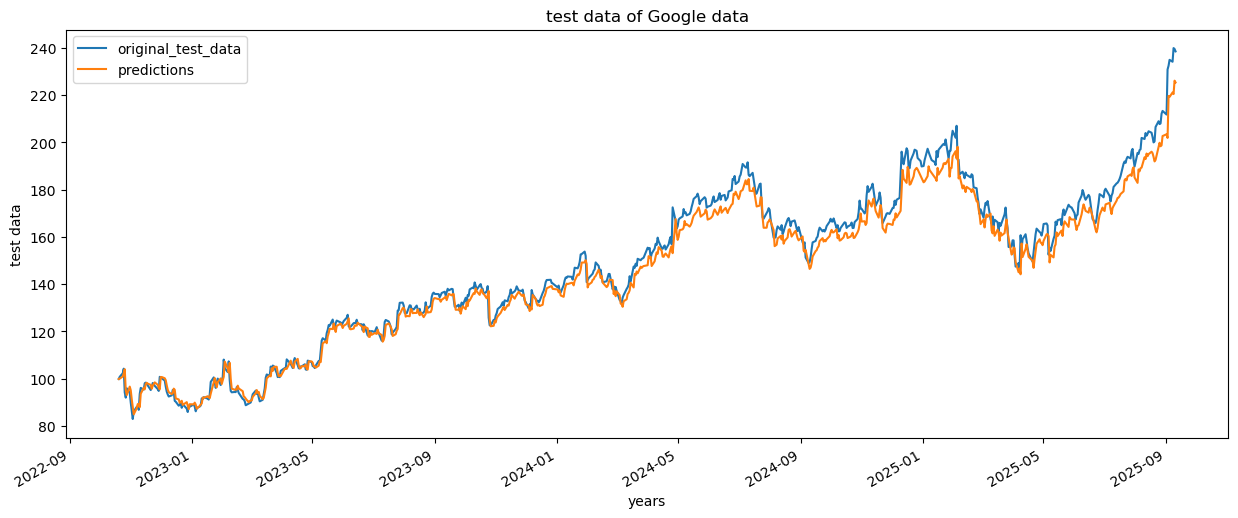

In [49]:

plot_graph((15,6), ploting_data, 'test data')
plt.show()

<Figure size 640x480 with 0 Axes>

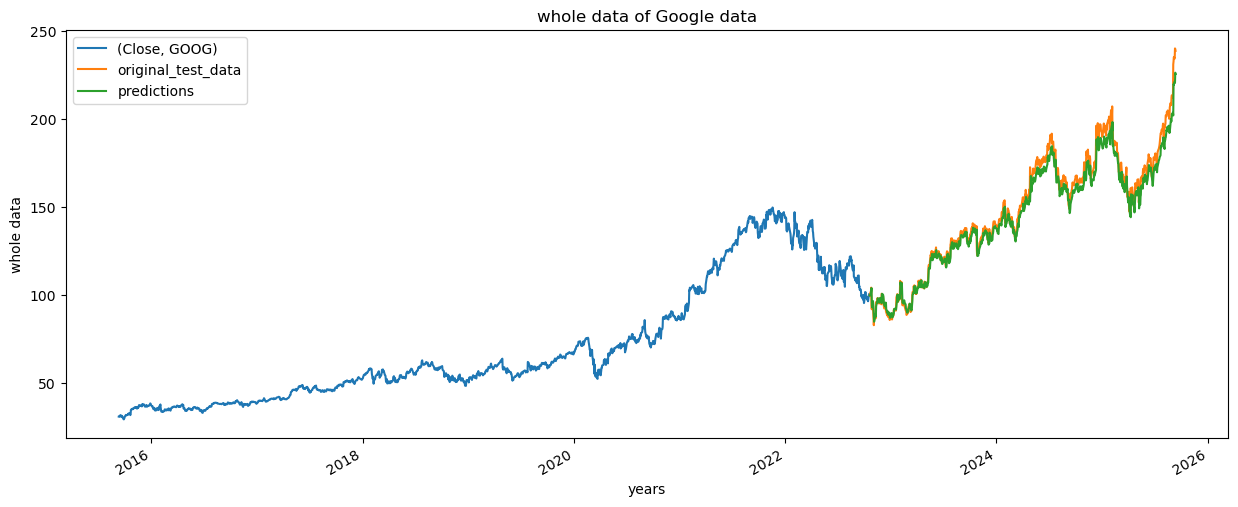

In [50]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')
plt.show()

In [51]:
model.save("Latest_stock_price_model.keras")